# Tensorflow architecture

TensorFlow is a Python Library that allows users to express arbitrary computation as a graph of data flows. Nodes in this graph represent mathematical operations (ops), whereas edges represent data that is communicated from one node to
another. 

Computation is defined as Directed Acyclic Graph (DAG, similar to Spark!):
  1. Graph is defined in a high-level language like C++, Python, go
  1. Graph is compiled and optimized
  1. Data (tensors) flow through graph
  
## Example of flow graph: forward propagation

Forward propagation can be represented as an acyclic flow graph. It provides a nice way of implementing a forward propagation in a modular way.
 1. Each node can be an object with fprop method, that computes the value given it's parents
 1. Calling the fprop method of each node in the right order (directed graph) will yield the forward propagation 

<img src="./images/flow_graph.png">


Data in TensorFlow are represented as tensors, which are multidimensional as arrays (equivalent to a NumPy array).

Formally, a NumPy array can be viewed as a mathematical object. If:

* The `dtype` belongs to some (usually field) $F$
* The array has dimension $N$, with the $i$-th axis having length $n_i$
* $N>1$

Then this array is an object in:

$$
F^{n_0}\otimes F^{n_{1}}\otimes\cdots \otimes F^{n_{N-1}}
$$

$F^n$ is an $n$-dimensional vector space over $F$. An element in here can be represented by its canonical basis $\textbf{e}_i^{(n)}$ as a sum for elements $f_i\in F$:

$$
f_1\textbf{e}_1^{(n)}+f_{2}\textbf{e}_{2}^{(n)}+\cdots +f_{n}\textbf{e}_{n}^{(n)}
$$

$F^n\otimes F^m$ is a tensor product, which takes two vector spaces and gives you another. Then the tensor product is a special kind of vector space with dimension $nm$. Elements in here have a special structure which we can tie to the original vector spaces $F^n,F^m$:

$$
\sum_{i=1}^n\sum_{j=1}^mf_{ij}(\textbf{e}_{i}^{(n)}\otimes \textbf{e}_{j}^{(m)})
$$

Above, $(\textbf{e}_{i}^{(n)}\otimes \textbf{e}_{j}^{(m)})$ is a basis vector of $F^n\otimes F^m$ for each pair $i,j$.

We will discuss what $F$ can be later; but most of this intuition (and a lot of NumPy functionality) is based on $F$ being a type corresponding to a field.




Although this framework for thinking about computation is valuable in many different fields, TensorFlow is primarily used for deep learning in practice and research.

  1. Core written in C++
  1. Different front-ends
      1. Python and C++ as of today
      1. Community is expected to add more 


<img src="images/tf_architecture.png">



## Constants

Constants are the operations that do not need any input. 

In [1]:
import tensorflow as tf
sess = tf.InteractiveSession()

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)
print product.eval()
sess.close()

[[ 12.]]


## Variables

TensorFlow variables are in-memory buffers that contain tensors, they are present across multiple executions of a graph. A TensorFlow variables have the following three properties:
  1. Variables must be explicitly initialized before a graph is used for the first time
  1. We can use gradient methods to modify variables after each iteration as we search for a model’s optimal parameter settings
  1. We can save the values stored in variables to disk and restore them for later use.


Creating a variable is simple, following creates a random variable with a given range and standard deviation:

```python
weights = tf.Variable(tf.random_normal([300, 200], stddev=0.5),
name="weights")
```

In [4]:
sess = tf.InteractiveSession()
# Create a Variable, that will be initialized to the scalar value 0.
state = tf.Variable(0, name="counter")

# Create an Op to add one to `state`.
one = tf.constant(1)
new_value = tf.add(state, one) #try state+one
update = tf.assign(state, new_value)

# Variables must be initialized by running an `init` Op after having
# launched the graph.  We first have to add the `init` Op to the graph.
init_op = tf.global_variables_initializer()

# Launch the graph and run the ops.
# Run the 'init' op
sess.run(init_op)
# Print the initial value of 'state'
print(sess.run(state))
# Run the op that updates 'state' and print 'state'.
for _ in range(3):
    sess.run(update)
    print(sess.run(state))

sess.close()

0
1
2
3


Similarly to NumPy, one can use a set of predefined functions to create some common tensors:

```python
#tensor of zeros of a given shape and type float32
tf.zeros(shape, dtype=tf.float32, name=None)

#tensor of all ones with a given shape and element type float32
tf.ones(shape, dtype=tf.float32, name=None)

#random normal tensor of a given shape, mean and standard deciation
tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32,seed=None, name=None)

#same, random uniform
tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32,seed=None, name=None)
```

## TF operations

On a high-level, TensorFlow operations represent abstract transformations
that are applied to tensors in the computation graph. Operations may have
attributes that may be supplied before or during runtime. 

An operation consists of one or more kernels, which represent device-specific implementations.
For example, an operation may have separate CPU and GPU kernels
because it can be more efficiently expressed on a GPU. 

To provide an overview of the types of operations available, we include a table from
the original TensorFlow white paper detailing the various categories of operations in
TensorFlow.

Following table summarizes the mathematical ops available in Tensorflow

<pre>
|-------------------------------------------------------------------------------------------------
| Type                                | Examples                                                 |
|------------------------------------------------------------------------------------------------|
|Element-wise mathematical operations | Add, Sub, Mul, Div, Exp, Log, Greater, Less, Equal, ...  |
|Array operations                     |Concat, Slice, Split, Constant, Rank, Shape, Shuffle, ... |
|Matrix operations                    |MatMul, MatrixInverse, MatrixDeterminant, ...             | 
|Stateful operations                  |Variable, Assign, AssignAdd, ...                          |
|Neural network building blocks       |SoftMax, Sigmoid, ReLU, Convolution2D, MaxPool, ...       |   
|Checkpointing operations             |Save, Restore                                             |
|Queue and synchronization operations |Enqueue, Dequeue, MutexAcquire, MutexRelease, ...         |
|Control flow operations              |Merge, Switch, Enter, Leave, NextIteration                |
|-------------------------------------------------------------------------------------------------
</pre>

## TF placeholders

A variable is meant to be initialized only once. If we need to feed some external input to our calculation, we would need to use something that we could populate every iteration.

TensorFlow solves this problem using a construct called a placeholder. A placeholder
is instantiated as follows and can be used in operations just like ordinary TensorFlow
variables and tensors.

You supply feed data as an argument to a run() call. The feed is only used for the run call to which it is passed. The most common use case involves designating specific operations to be "feed" operations by using tf.placeholder() to create them:

In [31]:
sess = tf.InteractiveSession()

input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)

print(sess.run([output], feed_dict={input1:[7.], input2:[2.]}))

sess.close()

[array([ 14.], dtype=float32)]


A `placeholder()` operation generates an error if you do not supply a feed for it. See the MNIST fully-connected feed tutorial (source code) for a larger-scale example of feeds.

## Session

A TensorFlow program interacts with a computation graph using a session. The TensorFlow
session is responsible for building the initial graph, can be used to initialize
all variables appropriately, and to run the computational graph. In Jupyter notebook we use an InteractiveSession and eval function.

# Linear regression model

Let us add some complexity to the problems we are solving and move on to the linear regression model example.

Consider equation: `y = 0.1 * x + 0.3 + noise`
Which we are going to try to model with the following: `y = W * x + b`

Our goal is to figure out the value of `W` and `b`, given enough `(x, y)` value samples.

This is how we are going to solve it:


   1. Import libraries (cell 1.1)
   1. Create input data (cell 1.2)
   1. Build inference graph (cell 1.3)
      1. Create Variables to hold weights and biases.
      1. Create Operations that produce logistic outputs.
   1. Build training graph (cell 1.4)
      1. Loss
      1. Optimizer
      1. Train_op: Operation that minimizes Loss
   1. Create session and run initialization (cell 1.5)
   1. Perform training (cell 1.6)

In [5]:
# 1.1 Import tensorflow and other libraries.
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

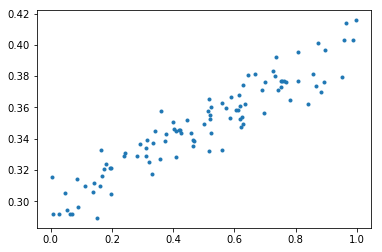

In [6]:
# 1.2 Create input data using NumPy. y = x * 0.1 + 0.3 + noise
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise

# Uncomment the following line to plot our input data.
pylab.plot(x_data, y_data, '.')

In [7]:
# 1.3 Buld inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

In [8]:
# 1.4 Build training graph.
loss = tf.reduce_mean(tf.square(y - y_data))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(0.5)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.global_variables_initializer()  # Create an operation initializes all the variables.

In [9]:
# 1.5 Uncomment the following line to see what we have built.
#print(tf.get_default_graph().as_graph_def())

In [10]:
# 1.6 Create a session and launch the graph.
sess = tf.InteractiveSession()
sess.run(init)

# Uncomment the following line to see the initial W and b values.
print(sess.run([W, b]))

[array([ 0.15526688], dtype=float32), array([ 0.], dtype=float32)]


In [11]:
# 1.7 Perform training.
for step in range(201):
    sess.run(train)
    # Uncomment the following two lines to watch training happen real time.
    if step % 20 == 0:
        print(step, sess.run([W, b]))

print(sess.run([W, b]))

(0, [array([ 0.28540719], dtype=float32), array([ 0.2722975], dtype=float32)])
(20, [array([ 0.15249893], dtype=float32), array([ 0.27224702], dtype=float32)])
(40, [array([ 0.11932871], dtype=float32), array([ 0.28950116], dtype=float32)])
(60, [array([ 0.10880832], dtype=float32), array([ 0.29497355], dtype=float32)])
(80, [array([ 0.10547166], dtype=float32), array([ 0.29670918], dtype=float32)])
(100, [array([ 0.10441337], dtype=float32), array([ 0.29725966], dtype=float32)])
(120, [array([ 0.1040777], dtype=float32), array([ 0.29743427], dtype=float32)])
(140, [array([ 0.10397124], dtype=float32), array([ 0.29748964], dtype=float32)])
(160, [array([ 0.10393748], dtype=float32), array([ 0.2975072], dtype=float32)])
(180, [array([ 0.10392678], dtype=float32), array([ 0.29751277], dtype=float32)])
(200, [array([ 0.10392339], dtype=float32), array([ 0.29751453], dtype=float32)])
[array([ 0.10392339], dtype=float32), array([ 0.29751453], dtype=float32)]


(0, 1.0)

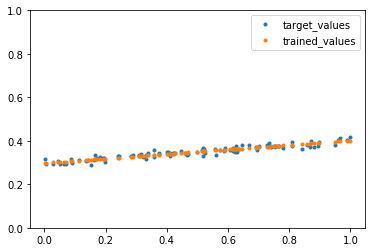

In [12]:
# 1.8 Uncomment the following lines to compare.
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, sess.run(y), ".", label="trained_values")
pylab.legend()
pylab.ylim(0, 1.0)

#sess.close()

<p>Continue on to the next exercise: [5_TF_CNN.ipynb](5_TF_CNN.ipynb).</p>